In [9]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
drive.mount('/content/drive')

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras import callbacks
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd drive/MyDrive/facial_expression/fer2013

[Errno 2] No such file or directory: 'drive/MyDrive/facial_expression/fer2013'
/content/drive/MyDrive/facial_expression/fer2013


In [11]:
df = pd.read_csv('fer2013.csv')
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
img_array = np.stack(df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')), axis=0)
labels = df.emotion.values

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1, random_state=2)

X_train = X_train/255
X_test = X_test/255

In [12]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [13]:
basemodelRelu = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [14]:
basemodelTanh = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='tanh',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='tanh',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='tanh',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='tanh'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='tanh'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [15]:
basemodelSigmoid = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='sigmoid',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='sigmoid',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='sigmoid'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(512, activation='sigmoid'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [16]:
basemodelRelu.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [17]:
basemodelTanh.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [18]:
basemodelSigmoid.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [19]:
try:
  os.mkdir("checkpoint")
except:
  pass

file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)
print(checkpoint_path)
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

checkpoint/best_model.h5


In [20]:
from keras import callbacks
filenameRelu='model_train_newRelu.csv'
filenameTanh='model_train_newTanh.csv'
filenameSigmoid='model_train_newSigmoid.csv'

filepathRelu = os.path.join('checkpoint', filenameRelu)
filepathTanh = os.path.join('checkpoint', filenameTanh)
filepathSigmoid = os.path.join('checkpoint', filenameSigmoid)

csv_logRelu=callbacks.CSVLogger(filenameRelu, separator=',', append=False)
csv_logTanh=callbacks.CSVLogger(filenameTanh, separator=',', append=False)
csv_logSigmoid=callbacks.CSVLogger(filenameSigmoid, separator=',', append=False)

checkpointRelu = callbacks.ModelCheckpoint(filepathRelu, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpointTanh = callbacks.ModelCheckpoint(filepathTanh, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpointSigmoid = callbacks.ModelCheckpoint(filepathSigmoid, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

callbacks_listRelu = [csv_logRelu,checkpointRelu]
callbacks_listTanh = [csv_logTanh,checkpointTanh]
callbacks_listSigmoid = [csv_logSigmoid,checkpointSigmoid]

callbacks_listRelu = [csv_logRelu]
callbacks_listTanh = [csv_logTanh]
callbacks_listSigmoid = [csv_logSigmoid]

In [21]:
histTanh = basemodelTanh.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test) ,callbacks=checkpointTanh)

Epoch 1/30
1010/1010 [==============================] - 41s 9ms/step - loss: 1.5883 - accuracy: 0.3875 - val_loss: 1.4207 - val_accuracy: 0.4536

Epoch 00001: val_accuracy improved from -inf to 0.45361, saving model to checkpoint/model_train_newTanh.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newTanh.csv/assets
Epoch 2/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.3882 - accuracy: 0.4729 - val_loss: 1.3815 - val_accuracy: 0.4631

Epoch 00002: val_accuracy improved from 0.45361 to 0.46308, saving model to checkpoint/model_train_newTanh.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newTanh.csv/assets
Epoch 3/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.3009 - accuracy: 0.5062 - val_loss: 1.3223 - val_accuracy: 0.5035

Epoch 00003: val_accuracy improved from 0.46308 to 0.50348, saving model to checkpoint/model_train_newTanh.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newTanh.csv/assets
Epo

In [22]:
histRelu = basemodelRelu.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test) ,callbacks=checkpointRelu)

Epoch 1/30
1010/1010 [==============================] - 10s 9ms/step - loss: 1.8059 - accuracy: 0.2541 - val_loss: 1.7356 - val_accuracy: 0.2934

Epoch 00001: val_accuracy improved from -inf to 0.29340, saving model to checkpoint/model_train_newRelu.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newRelu.csv/assets
Epoch 2/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.6500 - accuracy: 0.3396 - val_loss: 1.5258 - val_accuracy: 0.3970

Epoch 00002: val_accuracy improved from 0.29340 to 0.39705, saving model to checkpoint/model_train_newRelu.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newRelu.csv/assets
Epoch 3/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.4987 - accuracy: 0.4194 - val_loss: 1.4156 - val_accuracy: 0.4450

Epoch 00003: val_accuracy improved from 0.39705 to 0.44497, saving model to checkpoint/model_train_newRelu.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newRelu.csv/assets
Epo

In [23]:
histSigmoid = basemodelSigmoid.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test) ,callbacks=checkpointSigmoid)

Epoch 1/30
1010/1010 [==============================] - 10s 9ms/step - loss: 1.8482 - accuracy: 0.2265 - val_loss: 1.8187 - val_accuracy: 0.2510

Epoch 00001: val_accuracy improved from -inf to 0.25104, saving model to checkpoint/model_train_newSigmoid.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_newSigmoid.csv/assets
Epoch 2/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.8167 - accuracy: 0.2479 - val_loss: 1.8115 - val_accuracy: 0.2510

Epoch 00002: val_accuracy did not improve from 0.25104
Epoch 3/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.8144 - accuracy: 0.2504 - val_loss: 1.8147 - val_accuracy: 0.2510

Epoch 00003: val_accuracy did not improve from 0.25104
Epoch 4/30
1010/1010 [==============================] - 9s 9ms/step - loss: 1.8143 - accuracy: 0.2504 - val_loss: 1.8108 - val_accuracy: 0.2510

Epoch 00004: val_accuracy did not improve from 0.25104
Epoch 5/30
1010/1010 [==============================] - 9s 9ms/

<Figure size 432x288 with 0 Axes>

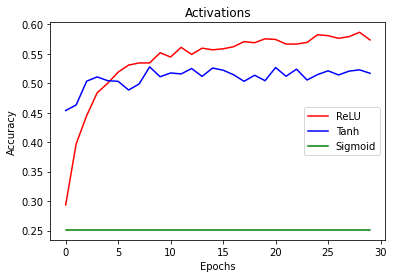

<Figure size 432x288 with 0 Axes>

In [25]:
from matplotlib import pyplot
%matplotlib inline

train_loss=histRelu.history['loss']
val_loss=histRelu.history['val_loss']
train_acc=histRelu.history['accuracy']

val_accTanh=histTanh.history['val_accuracy']
val_accRelu=histRelu.history['val_accuracy']
val_accSigmoid=histSigmoid.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,val_accRelu,'r', label='ReLU')
pyplot.plot(epochs,val_accTanh,'b', label='Tanh')
pyplot.plot(epochs,val_accSigmoid,'g', label='Sigmoid')
pyplot.title('Activations')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()